# Sound processing using Python
*IMPRS - Using Python for Cognitive Science (2022). This tutorial is made by Noor Seijdel and is partly based on work by [Sophie Slaats](https://www.mpi.nl/people/slaats-sophie), and on  several [Pydub](https://github.com/jiaaro/pydub) tutorials*

Welcome! In this module we will learn how to use Python for sound processing. Last week, we dicsussed Image Processing. This week, we will cover Sound Processing. 

After this session you will know:
- How to open and save sound files and manipulate them using the PyDub package
- How to split and splice sound files
- How to append or mix audio from different files 
- How to change audio levels or apply simple effects such as filters 

All of these can be achieved using Pydub, a simple, well-designed Python module for audio manipulation. In the words of the PyDub authors:
"Pydub lets you do stuff to audio in a way that isn't stupid". 


*For those who are interested we have added some resources for Using Praat in Python at the end of this tutorial. Note that this part is not mandatory.*


##### 1.1 Installation and imports
Following the installation guide, you have hopefully installed Pydub using pip, and ffmpeg using choco/brew. If not, please have a look at the installation manual. 






In [1]:
# You can also install a pip package in the current Jupyter kernel (uncomment the next lines)
# import sys
# !{sys.executable} -m pip install simpleaudio

In [16]:
import os
from pydub import AudioSegment, silence, effects
from pydub.playback import play
from matplotlib.pyplot import plot, show


In [17]:
# In some cases we might need to tell our computer where it can find ffmpeg. 
# doesn't hurt to add it ...
AudioSegment.converter = "C:\\Users\\noors\\ffmpeg\\bin\\ffmpeg.exe"

# Use the os module. Works for UNIX, Windows, MacOS...
# e.g., to get working directory
os.getcwd()

# or change working directory
# os.chdir("path")


'e:\\Projects\\2021_audiovisual\\session2b-soundprocessing'

##### 1.2 Reading audio files 

In [18]:
# where are the sound files?
sound_folder = "E:\\Projects\\2021_audiovisual\\session2b-soundprocessing\\raw"

# load a sound file
sound_path = os.path.join(sound_folder, "left_right.wav")
print(sound_path)
sound = AudioSegment.from_wav(sound_path)


E:\Projects\2021_audiovisual\session2b-soundprocessing\raw\left_right.wav


Just as with the image files, every audio file you work with will have a number of characteristics associated with them, such as, channels, frame rate (or sample rate), sample width and more.

'AudioSegment' has attributes like 'channels', 'dBFS', 'duration_seconds'.
Let's see what that means.


In [19]:
print(sound.duration_seconds)

# Or access several of them in one line
# dBFS: decibels relative to full scale
# full scale; maximum possible digital level
print(sound.channels, sound.dBFS, sound.duration_seconds)

2.6249886621315195
2 -19.789971874234105 2.6249886621315195



<font color='green'>**Exercise 1**</font>  Find out what the frame rate and max amplitude of sound is.


In [20]:
print(sound.frame_rate, sound.max)

44100 32392


The frame rate or sampling rate says that this audio was recorded (sampled) with a sampling frequency of 44100. In other words, while recording this file we were capturing 44100 amplitudes every second. Thus, If we want to know the duration of the audio, we can also  divide the number of samples (frames) by the sampling-rate:

In [21]:
duration_snd = sound.frame_count()/sound.frame_rate
print(duration_snd)

2.6249886621315195


One way to manipulate or change an audio file is by using

`sound_edited = sound.set_ATTRIBUTENAME(x)`

For example, you can change the number of channels (convert the file from stereo to mono) by calling `sound_mono = sound.set_channels(1)'

<font color='green'>**Exercise 2**</font>  Try to change the frame rate:

In [22]:
sound_edited = sound.set_frame_rate(50)
print(sound_edited.frame_rate)

50


Okay! So AudioSegment objects are immutable and support a number of operations. 

##### 1.3 Let's play the sound!

In [23]:
# Play a sound
play(sound)

##### 1.4 Visualize the sound
A sound is a time-series, like EEG or MEG data. It is an array of samples with a specific value. PyDub can give us this so we can plot it:

In [24]:
array = sound.get_array_of_samples()

This returns the raw audio data as an array of (numeric) samples. 
*Note: if the audio has multiple channels, the samples for each channel will be serialized – for example, stereo audio would look like [sample_1_L, sample_1_R, sample_2_L, sample_2_R, …].*


In [11]:
# Take a look at the array
#print(array)


Now we can plot it! 

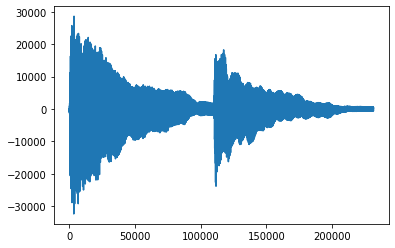

In [25]:
# Now we plot it. If you don't run in console, you have to type show() to actually open a window with the plot.
plot(array)
#show()


This visualization is called the time-domain representation of a given signal. This shows us the loudness (amplitude) of sound wave changing with time. Here amplitude = 0 represents silence. 

##### 1.5 Saving audio files and changing the extension

If you've made some changes to your audio files, or if they've got the wrong file extension, you can use PyDub to export and save them as new audio files.

You can do this by using the .export() function on any instance of an AudioSegment you've created. The export() function takes two parameters, out_f, or the destination file path of your audio file and format, the format you'd like your new audio file to be. Both of these are strings. format is "mp3" by default so be sure to change it if you need.

Let's start by saving the extension of our file to .mp3:

In [26]:
# Change the extension: wav to mp3
# first: split the extension and the name using os.path.splitext
# N.B.: the function os.path.split() splits the path to the folder from the filename.
filename, extension = os.path.splitext(sound_path)

# Export the sound to change the extension
new_filename = os.path.join(sound_folder, filename) + "new.mp3"
outfile_handle = sound.export(new_filename, format="mp3")
outfile_handle.close()

We can also remove it again:

In [27]:
os.remove(new_filename)


Or, we can make a new folder to save our edited or changed audiofiles:

In [28]:
new_folder = "E:\\Projects\\2021_audiovisual\\session2b-soundprocessing\\tmp"
if not os.path.isdir(new_folder): # Here we check if the folder already exists! If so, we do not have to make it again. 
   os.mkdir(new_folder)


<font color='green'>**Exercise 2:**</font>  Store the audio files in the new folder.


In [29]:
#### YOUR CODE HERE
# Hint: do you remember how to list all files in one folder?
# list all the files in the sound folder
sound_list = os.listdir(sound_folder)

# see what we've done
print(sound_list)

# save the sounds in the new folder
for sound_file in sound_list:
    sound_path = os.path.join(sound_folder, sound_file)
    sound = AudioSegment.from_wav(sound_path)
    sound.export(os.path.join(new_folder, sound_file))

['c.wav', 'e.wav', 'g.wav', 'HF_recording.wav', 'left_right.wav', 'LF_recording.wav', 'metallic-beat-short.wav', 'notes_2_16_44.wav', 'NW_recording.wav', 'Sample.wav', 'the_north_wind_and_the_sun.wav']


Okay, so we now know how to read in audio files, inspect their attributes, visualize them and export them (to different formats). Now let's have a look at manipulating your audio files! 

##### 1.6 Manipulating Audiofiles 
##### 1.6.1 Splitting and splicing

We can split our audiofile in two on the basis of duration. 

Let's try to get the first half and the second half of our audiofile (note that Pydub works in milliseconds!)

In [30]:

halftime = (sound.duration_seconds / 2) * 1000
first_half = sound[:halftime]
second_half = sound[halftime:]


Did it work?

<font color='green'>**Exercise 3:**</font>  Check if it worked by playing the two audiofiles: 

In [31]:
### YOUR CODE HERE
play(first_half)
play(second_half)

##### 1.6.2 Combining

We can also combine multiple AudioSegment objects by concatenating them:  




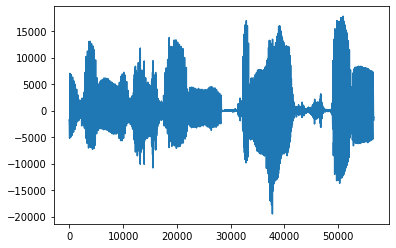

In [32]:
# concatenate them
wrong_order = second_half + first_half
plot(wrong_order.get_array_of_samples())


Or add silence in between:

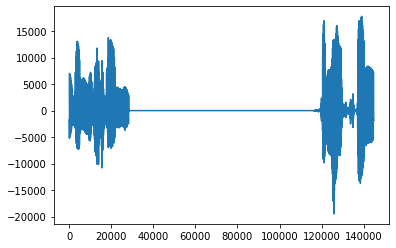

In [33]:
silent_time = AudioSegment.silent(duration=2000)
wrong_order_silence = second_half + silent_time + first_half

plot(wrong_order_silence.get_array_of_samples())


In [34]:
play(wrong_order_silence)

Note that any operation that combines multiple AudioSegment objects in any way will first ensure that they have the same number of channels, frame rate, sample rate, bit depth, etc. When these things do not match, the lower quality sound is modified to match the quality of the higher quality sound so that quality is not lost: mono is converted to stereo, bit depth and frame rate/sample rate are increased as needed. If you do not want this behavior, you may explicitly reduce the number of channels, bits, etc using the appropriate AudioSegment methods.


##### 1.6.3 Splitting on the basis of silence

But we can't just ADD silence -- we can also split the sound file on the basis of silence!
Let's try it out on a more complicated sound file: 


In [35]:
# load a sound file
sound_path = os.path.join(sound_folder, "HF_recording.wav")
print(sound_path)
sound = AudioSegment.from_wav(sound_path)


E:\Projects\2021_audiovisual\session2b-soundprocessing\raw\HF_recording.wav


In [36]:
play(sound)

In [37]:
words = silence.split_on_silence(sound, min_silence_len=500, silence_thresh=-50)

In [38]:
words

Okay, so splitting this file gives you multiple segments, depending on the parameters `min_silence_len` and `silence_thresh`. 

Let's listen to the first segment:


In [39]:
play(words[0])



<font color='green'>**Exercise 4 :**</font> What happens if we change the minimal silence length and the silence threshold? Try it out!

In [40]:
### YOUR CODE HERE 
words = silence.split_on_silence(sound, min_silence_len=5000, silence_thresh=-50)
print(len(words)) ## only one segment! 

words = silence.split_on_silence(sound, min_silence_len=50, silence_thresh=-50)
print(len(words)) ## 63 segments 

1
63


In [41]:
words = silence.split_on_silence(sound, min_silence_len=200, silence_thresh=-50)
print(len(words))

50


##### 1.6.4 Changing the volume

Are your audio files too loud or too quiet? You can make your AudioSegments louder or quieter by adding or subtracting integers. Let's make our wav file 4 decibels louders and 10 decibels quieter.

In [42]:
auto_sound = words[0]
# change the volume by a number of dBs
louder = auto_sound[:] + 4
lower = auto_sound[:] - 10

And play them:

In [43]:

play(louder)
play(lower)


In order to not confuse concatenation with volume change, you can also write:

In [44]:
louder = auto_sound.apply_gain(4)
lower = auto_sound.apply_gain(-10)

Sometimes, you might want to change the volume in comparison to a given value.
This is always relative to the maximum volume; maximum = 0.

In [45]:
print(louder.dBFS)
# say, we want the volume to be 6 dB lower than maximum; -6 dBFS
target_volume = -6
change = target_volume - louder.dBFS


-8.010777017556528


So this is how much we need to change the volume:

In [46]:

print(change)


2.010777017556528


In [47]:
# change it:
target_sound = auto_sound.apply_gain(change)
play(target_sound)


There are many other things you can do, such as play the sound backwards, change the speed or overlay different sounds:  

In [48]:
# Extra: funny stuff
# reverse
backwards = auto_sound.reverse()
play(backwards)

In [49]:
# Change the speed
hasty = effects.speedup(auto_sound, playback_speed=1.5)
play(hasty)

In [50]:
# Fade-out
faded = backwards.fade_in(1000).fade_out(1000)
play(faded)

In [51]:
# Overlay 
overlayed = target_sound.overlay(backwards)
play(overlayed)


##### 1.7 Synthesizing Tones
Aside from loading and processing audio files, Pydub can also synthesize new tones.
These can be sine, square, or sawtooth waves, at any frequency. It can also generate white noise. Tones can be turned into AudioSegment and combined like regular audio files.
In the following example, we’ll use the Sine class to generate sine tones for the first 15 intervals in the harmonic series.


In [52]:
from pydub.generators import Sine

# Create an empty AudioSegment
result = AudioSegment.silent(duration=0)
# Loop over 0-14
for n in range(15):
    # Generate a sine tone with frequency 200 * n
    gen = Sine(200 * n)
    # AudioSegment with duration 200ms, gain -3
    sine  = gen.to_audio_segment(duration=200).apply_gain(-3)
    # Fade in / out
    sine = sine.fade_in(50).fade_out(100)
    # Append the sine to our result
    result += sine
# Play the result
play(result)



*Notice how we use the += operator to append each 200ms sine tone to the end of our empty segment.*

<font color='green'>**Exercise 5:**</font> Play around with synthesizing tones and make a nice short song (if you do not think this is fun and helps you develop your python skills, skip it)

In [ ]:
#### YOUR CODE HERE 

<font color='yellow'>**Homework assignment**</font> 

We have three conditions: High Frequency (HF), Low Frequency (LF), and Non-Words (NW). All words for each condition are stored in one .wav file.
Your task is to:
- split the words on the silence
- make sure they all have the same loudness
- save them in a folder corresponding to their condition (folder names: HF, LF, NW)


To help you, we have included a text file with information about the stimuli you are going to split (names & condition),
and returned a dictionary named 'stimuli' with condition as key, and the word itself as value. You can use this dictionary to name the files you have to save.

**Quick check: did Teun discuss dictionaries in Session 1? or did we run out of time?** If so, do not worry! I will post some code snippets to help you get to the solution without knowledge of dictionaries. 


In [53]:
# This piece of code is here to help you.

import csv
path_to_repository = "E:\\Projects\\2021_audiovisual\\session2b-soundprocessing"  # add your own path here!

# It reads a text file with information about the stimuli you are going to split (names & condition),
# and returns a dictionary named 'stimuli' with condition as key, and the word itself as value.
# You can use this dictionary to name the files you have to save.
stimuli_info = open(os.path.join(path_to_repository, "lexdec_stimuli.txt"))
stimuli_reader = csv.reader(stimuli_info, delimiter=',')
headers = next(stimuli_reader, None)

# Create the dictionary
stimuli = {}
for stimulus in stimuli_reader:
    if stimulus[2] not in stimuli.keys():
        stimuli[stimulus[2]] = list()
    stimuli[stimulus[2]].append(stimulus[3])

# Put them in alphabetical order
for condition, words in stimuli.items():
    sort = sorted(words)
    stimuli[condition] = sort

# change the non-word condition name
stimuli["NW"] = stimuli.pop("none")

# Now you have the stimulus names. Let's take a look at the dictionary:
print(stimuli)

{'LF': ['ambten', 'balkons', 'barse', 'beitels', 'bonkte', 'buidels', 'clusters', 'deun', 'etui', 'flans', 'gevels', 'gisten', 'gonsde', 'grief', 'hese', 'imams', 'juffen', 'karpers', 'klavier', 'lanen', 'lijsters', 'lome', 'margriet', 'metrum', 'oker', 'polders', 'ponten', 'porde', 'puien', 'rafel', 'ratels', 'reigers', 'rogge', 'schoffels', 'schuiten', 'sfinxen', 'sikkels', 'sjalot', 'snert', 'spurt', 'stekken', 'stengels', 'stram', 'strotten', 'suste', 'topaas', 'venkel', 'woei', 'wrongel', 'zolders'], 'HF': ['auto', 'baby', 'begin', 'bezig', 'bij', 'boek', 'dacht', 'dood', 'eigen', 'gaf', 'gedaan', 'gemaakt', 'geweest', 'ging', 'had', 'hard', 'hele', 'help', 'hen', 'heren', 'hield', 'idee', 'juist', 'kom', 'krijg', 'lekker', 'los', 'moeder', 'morgen', 'ogen', 'open', 'plaats', 'plan', 'recht', 'redden', 'reden', 'soort', 'sta', 'uur', 'vallen', 'vraag', 'vroeg', 'wachten', 'wakker', 'werd', 'wist', 'zag', 'zeg', 'zit', 'zoek'], 'NW': ['ant', 'bezans', 'bluit', 'bluurde', 'brad', 'b

In [67]:
# To print the filenames from the HF condition:
print(stimuli['HF'])

# Or if you loop over them:
for stim in stimuli['HF']:
    print(stim)

['auto', 'baby', 'begin', 'bezig', 'bij', 'boek', 'dacht', 'dood', 'eigen', 'gaf', 'gedaan', 'gemaakt', 'geweest', 'ging', 'had', 'hard', 'hele', 'help', 'hen', 'heren', 'hield', 'idee', 'juist', 'kom', 'krijg', 'lekker', 'los', 'moeder', 'morgen', 'ogen', 'open', 'plaats', 'plan', 'recht', 'redden', 'reden', 'soort', 'sta', 'uur', 'vallen', 'vraag', 'vroeg', 'wachten', 'wakker', 'werd', 'wist', 'zag', 'zeg', 'zit', 'zoek']
auto
baby
begin
bezig
bij
boek
dacht
dood
eigen
gaf
gedaan
gemaakt
geweest
ging
had
hard
hele
help
hen
heren
hield
idee
juist
kom
krijg
lekker
los
moeder
morgen
ogen
open
plaats
plan
recht
redden
reden
soort
sta
uur
vallen
vraag
vroeg
wachten
wakker
werd
wist
zag
zeg
zit
zoek


In [65]:
# Example code to get the filenames for each of the words in the HF condition 

sound_path = os.path.join(sound_folder, "HF_recording.wav")
sound = AudioSegment.from_wav(sound_path)

words = silence.split_on_silence(sound, min_silence_len=200, silence_thresh=-50)

for word in words: 

    ## Manipulate or make changes to "word" here (word is a pydub audiosegment) 

    ## to get the filename, we can use the dictionary above by using: 
    # (they are listed in the correct order)
    filename = stimuli['HF'][words.index(word)] 
    print(filename)


auto
baby
begin
bezig
bij
boek
dacht
dood
eigen
gaf
gedaan
gemaakt
geweest
ging
had
hard
hele
help
hen
heren
hield
idee
juist
kom
krijg
lekker
los
moeder
morgen
ogen
open
plaats
plan
recht
redden
reden
soort
sta
uur
vallen
vraag
vroeg
wachten
wakker
werd
wist
zag
zeg
zit
zoek



##### Some hints:
1. Where are the stimuli?
2. How loud do you want your stimuli to be? Store it in a variable
3. Where do you want to save your files? Make separate folders for the conditions.
4. Do you normalize the volume for the whole sequence or for separate words? Why (not)? Try it if you like :)
5. You can check whether your splitting worked by playing the sound, or by printing the length of the resulting list
6. Use the index of the word [in the list of words you get after splitting] to get the right text from the dictionary (see example above)
7. Recall you can plot your results to see what you have done.
Good luck!

In [ ]:
### YOUR CODE HERE

<font color='pink'>**BONUS**: Praat in Python</font> 

If you're interested in using Praat in Python, LET US KNOW! There are some options. 
This is not part of the tutorial, but we can help you set it up if you like. 

*Disclaimer: I have no experience with Praat so I will only help you find the relevant materials*


In the next cells you will see some examples using **Parselmouth**, a Python library for the Praat software. 
From their [website](https://parselmouth.readthedocs.io/en/stable/): 

*"Though other attempts have been made at porting functionality from Praat to Python, Parselmouth is unique in its aim to provide a complete and Pythonic interface to the internal Praat code. While other projects either wrap Praat’s scripting language or reimplementing parts of Praat’s functionality in Python, Parselmouth directly accesses Praat’s C/C++ code (which means the algorithms and their output are exactly the same as in Praat) and provides efficient access to the program’s data, but also provides an interface that looks no different from any other Python library.
Please note that Parselmouth is currently in premature state and in active development. While the amount of functionality that is currently present is not huge, more will be added over the next few months. As such, feedback and possibly contributions are highly appreciated."* 


In [ ]:
## It is also possible to install libraries from your notebook directly. 
# Uncomment the next two lines if you want to try it out: 

#import sys
#!{sys.executable} -m pip install praat-parselmouth

In [46]:
import parselmouth
import matplotlib.pyplot as plt 
import numpy as np

In [47]:
sound = parselmouth.Sound("E:\\Projects\\2021_audiovisual\\session2b-soundprocessing\\raw\\the_north_wind_and_the_sun.wav")


`sound` is now a Parselmouth [Sound](../api_reference.rst#parselmouth.Sound) object, and we can access its values and other properties to plot them with the common `matplotlib` Python library:

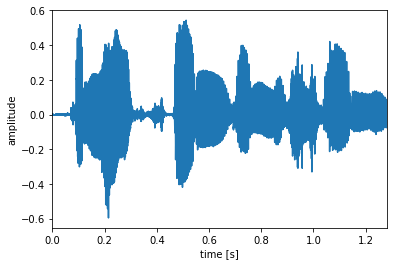

In [48]:
plt.figure()
plt.plot(sound.xs(), sound.values.T)
plt.xlim([sound.xmin, sound.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show() # or plt.savefig("sound.png"), or plt.savefig("sound.pdf")